In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load Dataset
dataset_train=pd.read_csv("Amazon.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
1,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
3,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
4,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100


In [4]:
#Train Model
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])

shape is =(251, 1)
[[85.459999]
 [86.550003]
 [85.330002]
 [83.029999]
 [87.459999]]


In [5]:
#Normalizing Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[-1.88947938],
       [-1.83206126],
       [-1.89632723],
       [-2.01748445],
       [-1.78412541],
       [-1.77833089],
       [-1.60133623],
       [-1.28527433],
       [-1.43013603],
       [-1.19308961],
       [-1.2684177 ],
       [-1.40063703],
       [-1.44699262],
       [-1.25208794],
       [-1.28527433],
       [-1.51547285],
       [-1.21626759],
       [-1.14831423],
       [-1.06613829],
       [-1.06245048],
       [-0.99028328],
       [-0.58361692],
       [-0.84647496],
       [-0.96921243],
       [-1.06192403],
       [-1.01609489],
       [-1.05402238],
       [-1.25208794],
       [-1.23681161],
       [-1.20731219],
       [-1.17149226],
       [-1.16517086],
       [-1.2394452 ],
       [-1.36903095],
       [-1.38167332],
       [-1.32794253],
       [-1.46437613],
       [-1.42486839],
       [-1.48492015],
       [-1.44646574],
       [-1.57605107],
       [-1.505991  ],
       [-1.37693218],
       [-1.43645738],
       [-1.46068879],
       [-1

In [6]:
#Creating Data Structures
X_train = []
Y_train = []
for i in range(50,250):
    X_train.append(scaled_training_set[i-50:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(200, 50)
(200,)


In [7]:
#Reshape Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(200, 50, 1)

In [8]:
#Build Model by Importing Libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
#Add Layers to LSTM
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1))

In [10]:
#Model Fitting
from keras.optimizers import RMSprop
regressor.compile(optimizer=RMSprop(), loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 200, batch_size = 16)

Epoch 1/200

13/13 [==============================] - 6s 48ms/step - loss: 0.2783
Epoch 2/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1326
Epoch 3/200
13/13 [==============================] - 1s 50ms/step - loss: 0.1204
Epoch 4/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1112
Epoch 5/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1282
Epoch 6/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1023
Epoch 7/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1146
Epoch 8/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1028
Epoch 9/200
13/13 [==============================] - 1s 46ms/step - loss: 0.1063
Epoch 10/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0901
Epoch 11/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0727
Epoch 12/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0874
Epoch 13/200
13/13 [====

13/13 [==============================] - 1s 49ms/step - loss: 0.0297
Epoch 99/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0314
Epoch 100/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0368
Epoch 101/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0320
Epoch 102/200
13/13 [==============================] - 1s 49ms/step - loss: 0.0316
Epoch 103/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0306
Epoch 104/200
13/13 [==============================] - 1s 48ms/step - loss: 0.0303
Epoch 105/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0317
Epoch 106/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0308
Epoch 107/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0320
Epoch 108/200
13/13 [==============================] - 1s 49ms/step - loss: 0.0399
Epoch 109/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0323
Epoch 110/200
13/13

13/13 [==============================] - 1s 45ms/step - loss: 0.0285
Epoch 197/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0278
Epoch 198/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0277
Epoch 199/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0283
Epoch 200/200
13/13 [==============================] - 1s 45ms/step - loss: 0.0269


In [11]:
#Extract Stock Prices
dataset_test = pd.read_csv("Amazon.csv")
predicted_stock_price = dataset_test.iloc[:,1:2].values

In [12]:
#Prepare Input for Model
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(50, 70):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
Y_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
#Predict Values
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 986ms/step


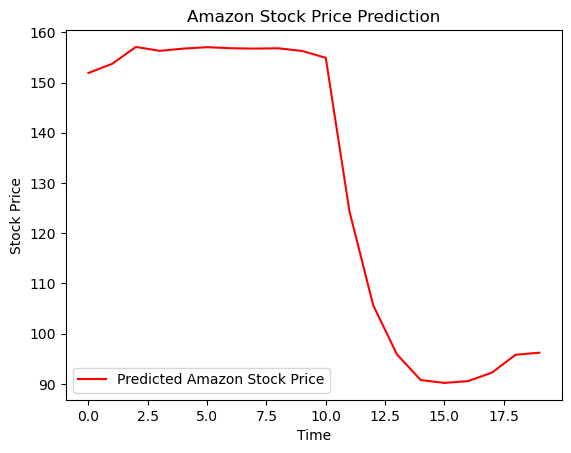

In [14]:
#Plot Predicted Values
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()